In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
# reading image
img = cv2.imread('/content/1676223304.png')

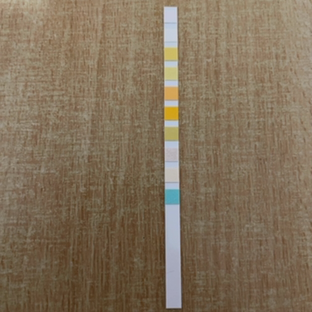

In [ ]:
cv2_imshow(img)

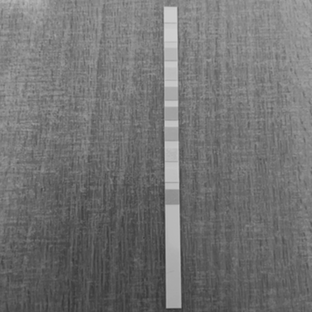

In [ ]:
# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

In [ ]:
# using a findContours() function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
i = 0

In [ ]:
# list for storing names of shapes
for contour in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
      
    # using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
  
    # finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
  
    # putting shape name at center of each shape
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 4:
        cv2.putText(img, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 5:
        cv2.putText(img, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    else:
        cv2.putText(img, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  

NameError: ignored

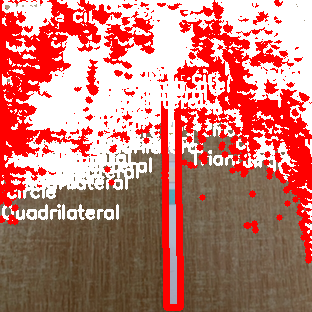

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
  
# reading image
img = cv2.imread('/content/1676223304.png')
  
# converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
  
# using a findContours() function
contours, _ = cv2.findContours(
    threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
i = 0
  
# list for storing names of shapes
for contour in contours:
  
    # here we are ignoring first counter because 
    # findcontour function detects whole image as shape
    if i == 0:
        i = 1
        continue
  
    # cv2.approxPloyDP() function to approximate the shape
    approx = cv2.approxPolyDP(
        contour, 0.01 * cv2.arcLength(contour, True), True)
      
    # using drawContours() function
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)
  
    # finding center point of shape
    M = cv2.moments(contour)
    x=0
    y=0
    if M['m00'] != 0.0:
        x = int(M['m10']/M['m00'])
        y = int(M['m01']/M['m00'])
  
    # putting shape name at center of each shape
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 4:
        cv2.putText(img, 'Quadrilateral', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 5:
        cv2.putText(img, 'Pentagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
    else:
        cv2.putText(img, 'circle', (x, y),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)
  
# displaying the image after drawing contours
cv2_imshow(img)
  
cv2.waitKey(0)
cv2.destroyAllWindows()

CROPPING THE IMAGE
The first task is to relaibly crop the dipstick from the background.

Method: 
I will be using OpenCV's cropping alorithm to try to crop the dipstick from the background.
- Will experiment on light background and light backgrounds. 
- Different lighting conditions.


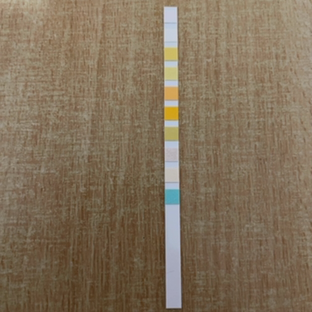

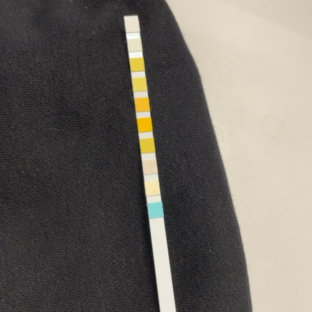

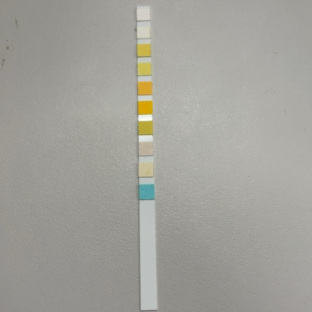

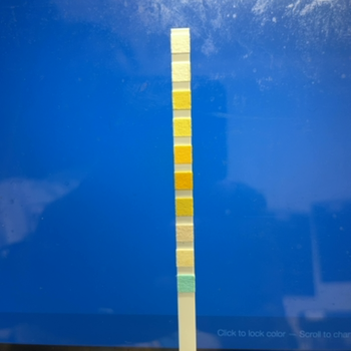

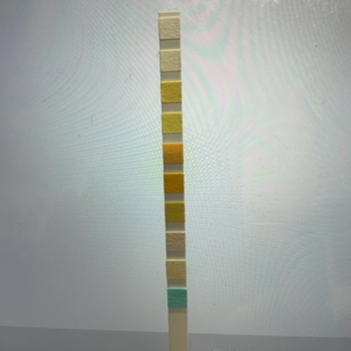

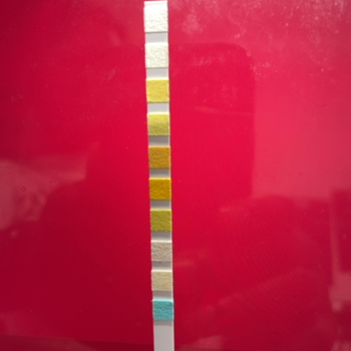

In [31]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


paths = ['/content/1676223304.png', '/content/1676322437.png', '/content/1676322641.png', '/content/1676323676.png', \
         '/content/1676323698.png', '/content/1676323713.png' ]
images = []
for path in paths:
  img = cv2.imread(path) # read the image
  images.append(img)
  cv2_imshow(img) # show the image

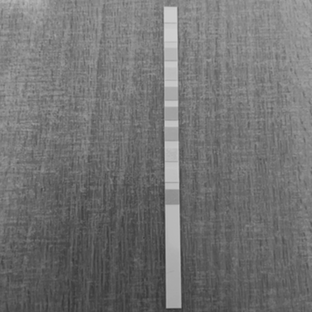

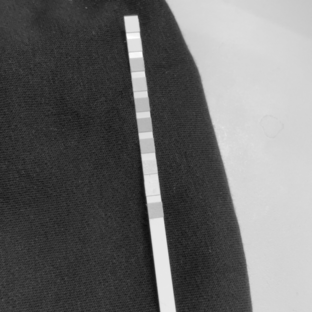

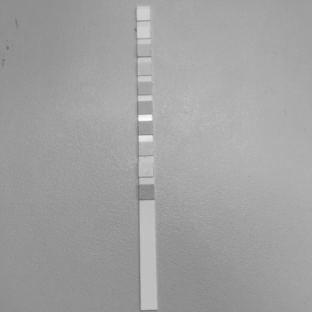

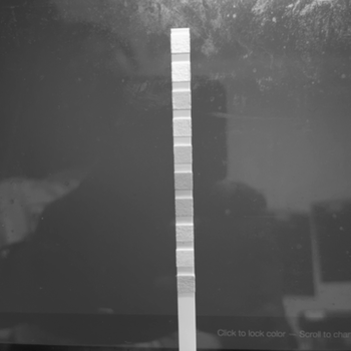

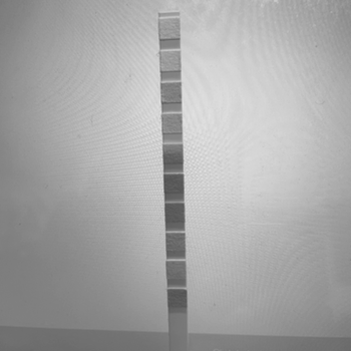

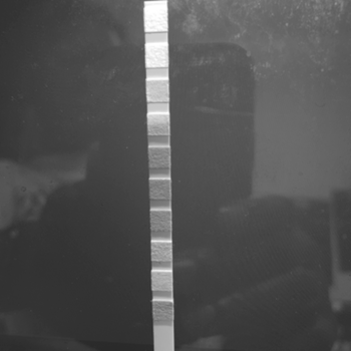

In [32]:
# gray1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
# gray2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
# gray3 = cv.cvtColor(img3,cv.COLOR_BGR2GRAY)
# cv2_imshow(gray1)
# cv2_imshow(gray2)
# cv2_imshow(gray3)



gray_images = []
for image in images:
  gray = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
  gray_images.append(gray)
  cv2_imshow(gray)



## OTSU Thresholding

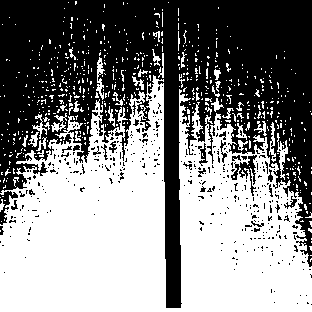

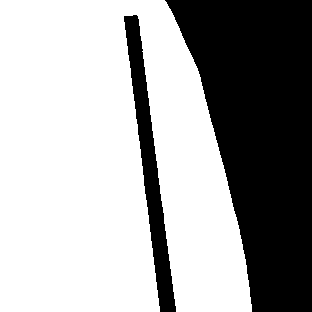

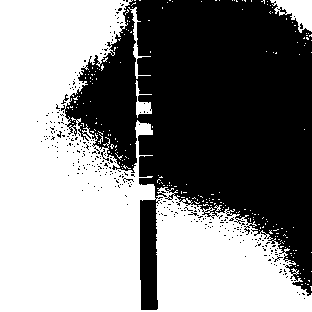

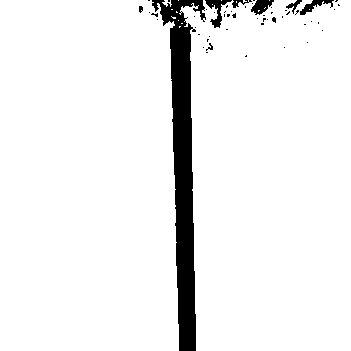

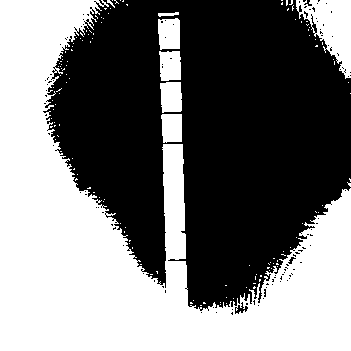

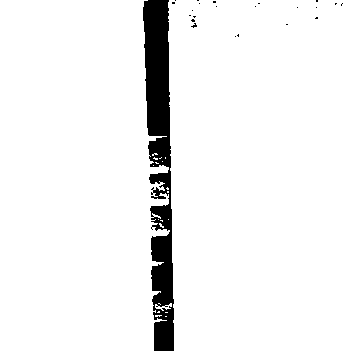

In [55]:
# ret1, thresh1 = cv.threshold(gray1,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# ret2, thresh2 = cv.threshold(gray2,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# ret3, thresh3 = cv.threshold(gray3,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
# cv2_imshow(thresh1)
# cv2_imshow(thresh2)
# cv2_imshow(thresh3)


for gray_image in gray_images:
  # Use open cv's threshold

  ret, thresh = cv.threshold(gray_image,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
  cv2_imshow(thresh)
  
  # ret, thresh = cv2.threshold(gray_image,0,255,cv2.THRESH_OTSU)
  # cv2_imshow(thresh)




As you can see from above the image on the black background produces the best image. 

There are some worries about the quality of the image that will be produced on the black background. When the background is purely black, smartphone camera overexpose the image and the image 

## ADAPTIVE THRESHOLDING

From OpenCV's website:
In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.

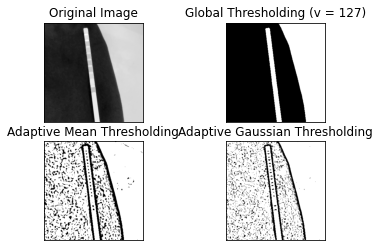

In [53]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('/content/1676322437.png',0)

img = cv.medianBlur(img,5)

ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)

th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)

th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

As you can see above, a standard Global Thresholding seems to perform the best on all the images.

## EDGE DETECTION

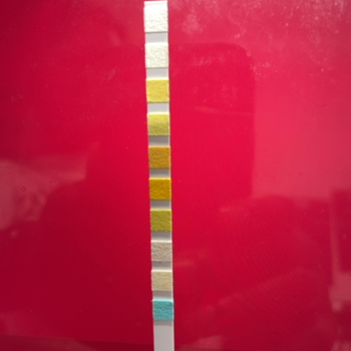

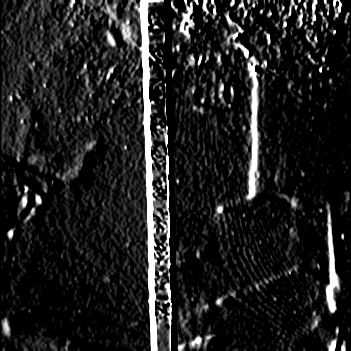

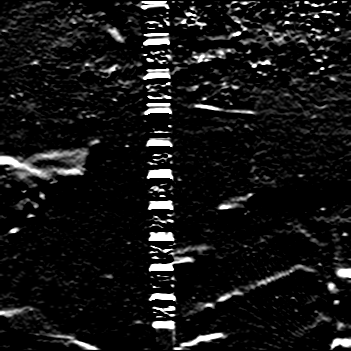

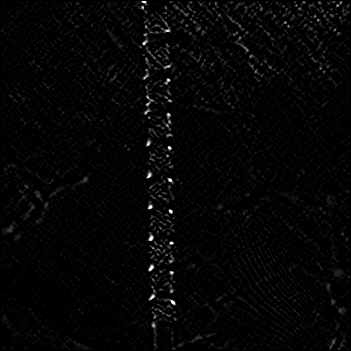

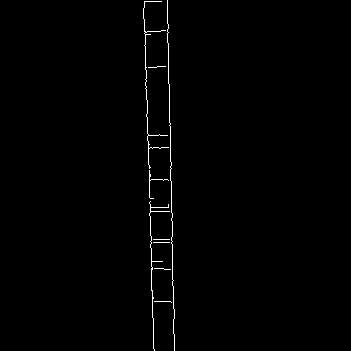

In [43]:
# Read the original image
img = cv2.imread('/content/1676323713.png') 
# Display original image
cv2_imshow(img)
cv2.waitKey(0)
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
 
# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images
cv2_imshow(sobelx)
cv2.waitKey(0)
cv2_imshow(sobely)
cv2.waitKey(0)
cv2_imshow(sobelxy)
cv2.waitKey(0)
 
# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2_imshow(edges)
cv2.waitKey(0)
 
cv2.destroyAllWindows()


As you can see above the canny edge detection algorithm by open cv does a pretty good job of detecting the edges in the image.

Is there a way I can incorporate this into the algorithm?

Maybe use edge detection to segment the application and crop the image.

## CROPPING IMAGE USING THRESHOLDING

Next step, is to figure out how to crop the images received using thresholdinng.

I have attempted that below.

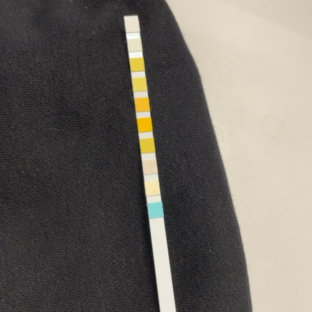

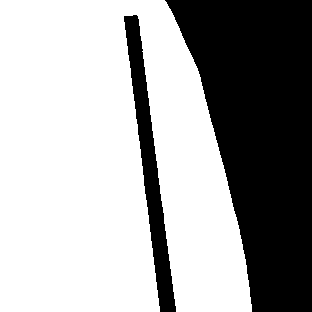

(0, 0, 252, 312)
(0, 0, 252, 312)


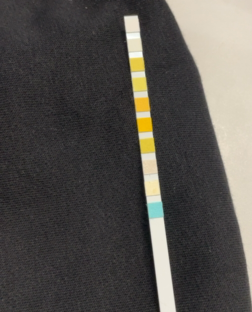

True

In [75]:
import cv2

img = cv2.imread('/content/1676322437.png')
cv2_imshow(img)
h, w = img.shape[:2]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


thr = cv2.threshold(gray, 192, 255, cv.THRESH_BINARY_INV+cv.THRESH_OTSU)[1]
cv2_imshow(thr)

bbox = cv.boundingRect(thr)

print(bbox)

x, y, w, h = bbox
print(bbox)

foreground = img[y:y+h, x:x+w]

# print(foreground)

cv2_imshow(foreground)
cv2.imwrite("foreground.png", foreground)


# image = cv2.imwrite('/content/1676223304.png', thr)




As you can see above, this was a failure. Next I am going to attempt to use PILLOW to crop the image.

# USING PILLOW

Installing the rembg library allows me to remove the background from the images relaibly. 

This can also be done by training a model on how to remove the background.

In [82]:
# !pip install rembg
from rembg import remove
from PIL import Image
input_path = '/content/1676223304.png'
output_path = 'output.png'
input = Image.open(input_path)
output = remove(input)
output.save(output_path)